In [7]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import scipy.stats as st

# Sample from Maxwell-Boltzmann Distribution

The Maxwell-Boltzmann distribution of speeds for non-interacting, non-relativistic classical particles in thermodynamic equilibrium in 3D:
$$f(v) = \bigg(\frac{m}{2\pi k_B T}\bigg)^{3/2}4\pi v^2e^{-\frac{mv^2}{2k_B T}}$$
Luckily, scipy.stats.maxwell has the pdf:
$$ f(x) = \sqrt{\frac{2}{\pi}}x^2 e^{\frac{-x^2}{2}} =\sqrt{\frac{1}{8\pi^2}}  4\pi x^2 e^{\frac{-x^2}{2}} $$
Thus for the scale argument in scipy.stats.maxwell we use
$$ scale = \sqrt{\frac{k_B T}{m}} $$

In [8]:
mass_Rb87 = 1.4431609 * 10**(-25) # kg
kB = 1.381 * 10**(-23) # J/K
T = 300 # K, room temp

scale = np.sqrt((kB * T)/mass_Rb87)
xarr = np.linspace(0, 1000, 1000)

def mbdist(v, m, T):
    return (m/(2*np.pi*kB*T))**(3/2) * 4*np.pi*v**2 * np.exp(-m*v**2/(2*kB*T))

In [9]:
# Sample N velocities:
def sampleVelocities(N, m=mass_Rb87, T=300):
    scale = np.sqrt((kB * T)/mass_Rb87)
    # Get N numbers from U[0,1]
    nums = st.uniform.rvs(size=1000)
    # Use inverse cdf of maxwell dist:
    return st.maxwell.ppf(nums, scale=scale)

Text(0.5, 0, 'v (m/s)')

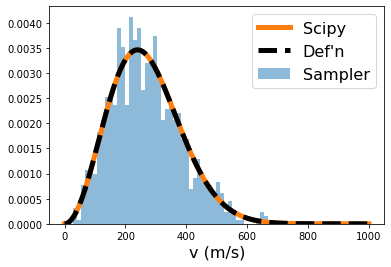

In [10]:
plt.hist(sampleVelocities(10000), density=True, bins=50, alpha=.5, label="Sampler")
plt.plot(xarr, st.maxwell.pdf(xarr, scale=scale), label="Scipy", lw=5)
plt.plot(xarr, mbdist(xarr, mass_Rb87, T), label="Def'n", ls="--", c="k", lw=5)
plt.legend(fontsize=16)
plt.xlabel("v (m/s)", fontsize=16)

In [11]:
# Sample a velocity vector by pulling speed from MB-Dist
# and choosing a point on the unit sphere
# To have uniformly distributed points picked on sphere
# One must sample x,y,z from Gaussian distribution
# https://mathworld.wolfram.com/SpherePointPicking.html
def sampleVelocityVec(m=mass_Rb87, T=300):
    scale = np.sqrt((kB * T)/mass_Rb87)
    magnitude = st.maxwell.ppf(st.uniform.rvs(size=1), scale=scale)
    # Get a sphere point:
    uvec = getSpherePoint()   
    return magnitude*uvec #, [0,0,0,uvec[0], uvec[1],uvec[2]]

def getSpherePoint():
    uvec = st.norm.rvs(size=3)
    uvec = uvec/np.sqrt(np.sum(uvec**2))    
    return uvec

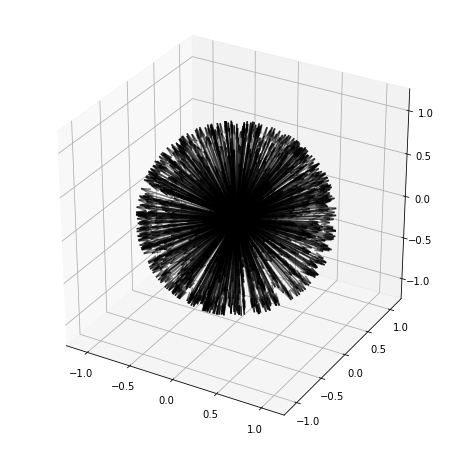

In [12]:
vecs = []
for dummy in range(1000):
    sp = getSpherePoint()
    vecs.append([0,0,0, sp[0], sp[1], sp[2]])
    
soa = np.array(vecs)

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="k", arrow_length_ratio=0.1, alpha=0.5)
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
plt.show()

In [18]:
varr = np.linspace(0, 1000, 10000)
#plt.plot(varr, st.maxwell.cdf(varr, scale=scale))